# 인공신경망(artificial neural network)

## 생각해 볼 문제

**문제 1)** 다음의 경우에서, $x$가 7일 때, $y$의 값은 얼마입니까?

|**$x$**|**$y$**|
|---|---|---|
|0|2|
|1|3|
|2|6|
|3|11|
|4|18|
|5|27|
|6|38|
|7|?|
|8|66|

**문제 2)** 위의 관계를 선형 회귀식으로 나타낼 수 있습니까?

# 코드

**코드 1)** "문제 1"을 선형 회귀 프로그램으로 풀어봅니다.

x=7 y=? [[ 0.43987903]]
------------------------------------
W [[ 0.66243857]]
b [-0.02382797]
loss 0.0375111


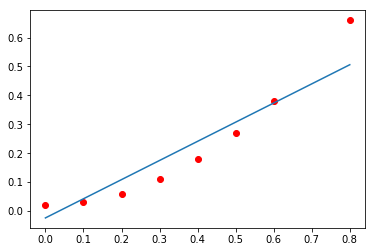

In [64]:
import tensorflow as tf
import matplotlib.pyplot as plt

W = tf.Variable(tf.zeros([1, 1]))
b = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 데이터를 정규화(normalize)하는 것이 중요합니다.
x_data = [[0.0], 
          [0.1], 
          [0.2], 
          [0.3], 
          [0.4], 
          [0.5], 
          [0.6], 
          [0.8]]
y_data = [[.02], 
          [.03], 
          [.06], 
          [.11], 
          [.18], 
          [.27], 
          [.38], 
          [.66]]

model = tf.matmul(x, W) + b
loss = tf.reduce_sum(tf.square(model - y))

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(200):
    sess.run(train, feed_dict={x: x_data, y: y_data})

print("x=7", "y=?",  sess.run(model, feed_dict={x: [[.7]]}))

print("------------------------------------")
print("W", sess.run(W))
print("b", sess.run(b))
print("loss", sess.run(loss, feed_dict={x: x_data, y: y_data}))

%matplotlib inline
y_ = sess.run(model, feed_dict={x: x_data})
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_)
plt.show()

"**코드 2)** 문제 1"을 신경망 프로그램으로 풀어봅니다.

x=7 y=? [[ 0.52444577]]
------------------------------------
W1 [[ 0.5375073   0.55929071 -0.84682059  0.7096402  -0.95135283  0.30052352
  -0.21535921 -0.29589343  0.54455209  0.08900868]]
W2 [[ 0.36884078]
 [ 0.32978484]
 [-0.77960706]
 [ 1.17369366]
 [-0.38263774]
 [-0.33719748]
 [ 0.39680076]
 [-0.82311153]
 [-0.47004855]
 [-0.51503998]]
b1 [-0.03867738 -0.04682932  0.         -0.26978603  0.         -0.24149601
  0.          0.         -0.43742236 -0.07845309]
b2 [ 0.019881]
loss 0.00132997


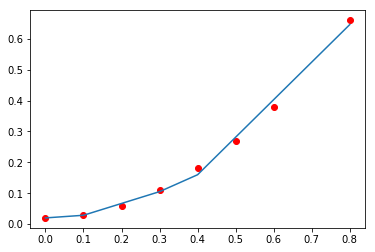

In [118]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 신경망에서는 가중치를 '0'이 아니라 난수로 초기화해야만 학습이 가능합니다.
W1 = tf.Variable(tf.random_uniform([1, 10], -1, 1))
b1 = tf.Variable(tf.zeros([10]))
W2 = tf.Variable(tf.random_uniform([10, 1], -1, 1))
b2 = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

x_data = [[0.0], 
          [0.1], 
          [0.2], 
          [0.3], 
          [0.4], 
          [0.5], 
          [0.6], 
          [0.8]]
y_data = [[.02], 
          [.03], 
          [.06], 
          [.11], 
          [.18], 
          [.27], 
          [.38], 
          [.66]]

L1 = tf.nn.relu(tf.matmul(x, W1) + b1)

model = tf.matmul(L1, W2) + b2
loss = tf.reduce_sum(tf.square(model - y))

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(10000):
    sess.run(train, feed_dict={x: x_data, y: y_data})

print("x=7", "y=?",  sess.run(model, feed_dict={x: [[.7]]}))

print("------------------------------------")
print("W1", sess.run(W1))
print("W2", sess.run(W2))
print("b1", sess.run(b1))
print("b2", sess.run(b2))
print("loss", sess.run(loss, feed_dict={x: x_data, y: y_data}))

%matplotlib inline
y_ = sess.run(model, feed_dict={x: x_data})
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_)
plt.show()

**신경망을 통해서 비선형의 문제를 풀 수 있습니다.**

"**코드 3)** 문제 1"을 다층 신경망 프로그램으로 풀어봅니다.

x=7 y=? [[ 0.52002245]]
------------------------------------
W1 [[-0.07586861 -0.4049499   0.45395193  0.9920547  -0.91539931  0.77438051
   0.60203791 -0.14035439 -0.27673721  1.0105778 ]]
W2 [[ 0.35578322 -0.56802201 -0.09509635 -0.0987792  -0.38431835  0.74238276
  -0.70493937  0.46592617  0.22398949 -0.85181737]
 [ 0.30016255  0.3586421  -0.40471935 -0.31304264 -0.44059229 -0.1701057
   0.12751222 -0.14494371 -0.51701784 -0.26338601]
 [-0.77599692 -0.73140311  0.47941309  0.98313236  0.05861426  0.56292576
  -0.80430323  0.10536575  0.78865772 -0.34722877]
 [-0.92458844  0.06487604 -0.27961889 -0.64384389  0.60167342  1.01069856
   0.69319147  0.35933554 -0.64002275 -0.70548749]
 [-0.48266554  0.11959291 -0.43488359  0.93410158  0.25272298 -0.70943737
  -0.37772965 -0.54861355  0.43795609 -0.09187484]
 [ 0.8479259  -0.46652427  0.01416314 -0.16250961  0.27409267  0.66534984
   0.92366552 -0.49259511  0.52642715  0.66605616]
 [-0.8423171  -0.83650476  0.34100148 -0.94465357 -0.68674

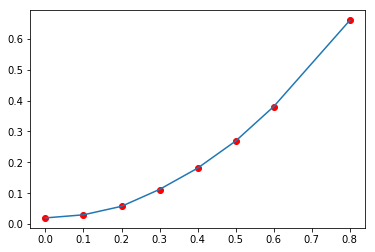

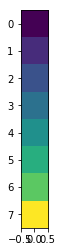

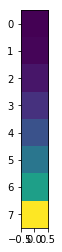

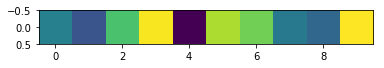

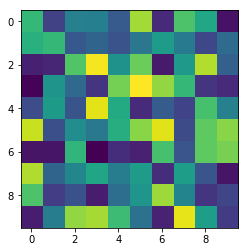

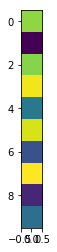

In [116]:
import tensorflow as tf
import matplotlib.pyplot as plt

W1 = tf.Variable(tf.random_uniform([1, 10], -1, 1))
b1 = tf.Variable(tf.zeros([10]))
W2 = tf.Variable(tf.random_uniform([10, 10], -1, 1))
b2 = tf.Variable(tf.zeros([10]))
W3 = tf.Variable(tf.random_uniform([10, 1], -1, 1))
b3 = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

x_data = [[0.0], 
          [0.1], 
          [0.2], 
          [0.3], 
          [0.4], 
          [0.5], 
          [0.6], 
          [0.8]]
y_data = [[.02], 
          [.03], 
          [.06], 
          [.11], 
          [.18], 
          [.27], 
          [.38], 
          [.66]]

L1 = tf.nn.relu(tf.matmul(x, W1) + b1)
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

model = tf.matmul(L2, W3) + b3
loss = tf.reduce_sum(tf.square(model - y))

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(10000):
    sess.run(train, feed_dict={x: x_data, y: y_data})

print("x=7", "y=?",  sess.run(model, feed_dict={x: [[.7]]}))

print("------------------------------------")
print("W1", sess.run(W1))
print("W2", sess.run(W2))
print("W3", sess.run(W3))
print("b1", sess.run(b1))
print("b2", sess.run(b2))
print("b3", sess.run(b3))
print("loss", sess.run(loss, feed_dict={x: x_data, y: y_data}))

%matplotlib inline
y_ = sess.run(model, feed_dict={x: x_data})
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_)
plt.show()

import matplotlib
import numpy as np

%matplotlib inline
plt.imshow(x_data)
plt.show()

%matplotlib inline
plt.imshow(y_data)
plt.show()

%matplotlib inline
plt.imshow(sess.run(W1))
plt.show()

%matplotlib inline
plt.imshow(sess.run(W2))
plt.show()

%matplotlib inline
plt.imshow(sess.run(W3))
plt.show()

**보다 좋은 결과를 만들기 위하여, 신경망을 여러 층으로 만들 수 있습니다.**